In [1]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import glob

# Load up all csvs in the relevant directory

directory = "dreamfiles/dream_bn_last3_layer8_888"
neuron_indices = [0]
fileLists = []
data = []
for neuron in neuron_indices:
    fileLists.append(glob.glob(f"{directory}/*_{neuron}.csv"))
    
fileLists = fileLists[0]
# Now load up all the csv files

for filename in fileLists:
    df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), list(df.iloc[:,2])])
    
    
# Some preliminaries 

DIM = [2] * 4
kets = hf.makeState('0000+1111')
state = fc.State(kets, normalize=True)
edges = th.buildAllEdges(DIM)


# Load up initial and final dataset.

init = []
final = []

for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])

# Figure 2: Plotting Fidelity-Loss Evolution

In [2]:
# We can obtain the total number of epochs from the datalength. 
# We save data every 100 epochs in the procedure, so we therefoe have e.g.
# 100 * len(data[0][0]) epochs

epochs = np.arange(0,len(data[0][0])*100,100)
fancySample = data[maxFid]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

fig.suptitle("GHZ Fidelity - Loss Evolution \n [400,400,400,10] neural network")

# make a plot
ax.scatter(epochs,fancySample[0], color='r', s = 8)
ax.plot(epochs[-1],[fancySample[0][-1]], marker='*', markersize=14)

# set x-axis label
ax.set_xlabel("Epochs", fontsize = 12)
# set y-axis label
ax.set_ylabel("GHZ Fidelity",
              color="red",
              fontsize=12)

ax2=ax.twinx()
# set x-axis label
ax2.set_xlabel("Epochs", fontsize = 12)
# set y-axis label
ax2.set_ylabel("Activation",
              color="Blue",
              fontsize=12)

# make a plot
ax2.scatter(epochs,fancySample[1], color='b', s=8)
ax2.plot(epochs[-1],[fancySample[1][-1]], marker='*', markersize=14)

NameError: name 'maxFid' is not defined

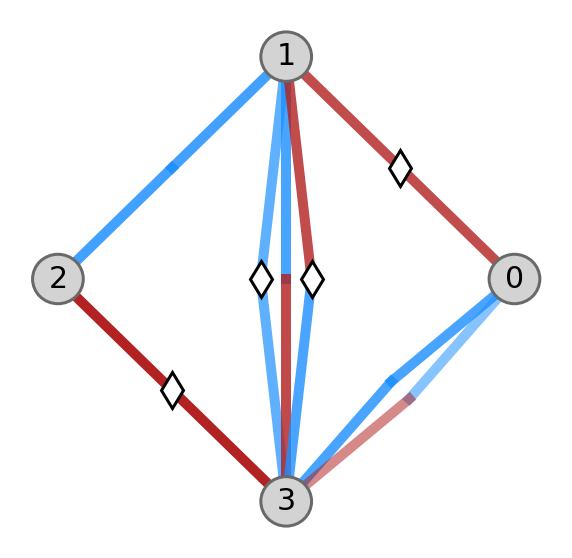

In [41]:
# Now we apply renormalization on our chosen graph and make a fancy graph plot of the smegger

graphWeights = []

for weights in fancySample[2]:
    temp = eval(weights)
    temp = [w / np.max(np.abs(temp)) for w in temp] # renormalization step
    graphWeights.append(temp)


def plotGraph(graphWeight, edges, epoch, threshold):
    graph = fc.Graph(edges=edges, weights=graphWeight[epoch])
    graph.purge(threshold=threshold, update=True)
    newgraph = fc.Graph(graph.edges, weights=graph.weights)
    gp.graphPlot(newgraph)
    #gp.leiwandPlot(newgraph, name=f"graph_{epoch}")

plotGraph(graphWeights, edges, 200 ,0.4)

In [46]:
%hist -g 

 5/1: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/2: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/3: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/4: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/5: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/6: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/7: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 5/8: DIM
 6/1: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 6/2: input_edges
 6/3: len(input_edges)
 6/4: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 6/5: runfile('C:/Users/freem/Downloads/neural_net.py', wdir='C:/Users/freem/Downloads')
 6/6: runfile('C:/Users/freem/Downloads/neural_net.py', wdi

72/18: ket_amplitudes
72/19: input_edges
72/20: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/neural_net.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python')
72/21: kets_of_data
72/22: ket_amplitudes[0]
72/23: kets_of_data[1]
72/24: kets_of_data[0]
72/25: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/neural_net.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python')
72/26: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/neural_net.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python')
72/27: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/neural_net.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python')
72/28: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/neural_net.py', wdir='C:/U

103/36: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project/deep_graph_dreaming.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project')
103/37: len(data_full)
104/1: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Aberrated Knots/digitalholographyreconstructionofknot.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Aberrated Knots')
105/1: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Aberrated Knots/digitalholographyreconstructionofknot.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Aberrated Knots')
105/2: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Aberrated Knots/digitalholographyreconstructionofknot.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/

132/3: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project/read_the_damn_pickle.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project')
132/4: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project/deep_graph_dreaming.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project')
132/5: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project/deep_graph_dreaming.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project')
132/6: runfile('C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Project/movie_maker.py', wdir='C:/Users/freem/Desktop/Toaster Files/Great Library/The Code Matrix/Python/Deep_Graph_Dreaming_Proje

171/5:
#First step, Making a list for different planes, that contains 5 images for each plane. A furier filter of radius given by filter_radius is applied onto each one of our images 

Filtered_images = []
Num_of_planes = ["36"]

maxPlanes = 80

'''
for i in range(0,maxPlanes):
    Num_of_planes.append(str(i))
    
'''
    
# Parameterization used to load up the experimental data 
month = "8"
day = "19"

Knot_Type = "trefoil" 
a = "1"
b = "0.75"
s = "1.2"
w = "320"

n = "3"
m = "-3"
stre = "0"

Fold = "3"
direc =  f"\\{month}.{day}.2022\\{Knot_Type}_a{a}_b{b}_s{s}_w{w}_n{n}_m{m}_str{stre}\\"
knotFolder =  os.getcwd() +direc
filter_radius = 30 # Inner radius of the low bandpass filter

# Load up the images of relative phases for each plane we choose to load (here, we only load up the waist plane, so it's going to be one image for each relative phase)
# We usually pull up images from a shared KnotExperiment_Photos folder. Request access to that folder if you don't already have it. Be sur

188/36:
# We generate our theoretical beam carrying our knot

w0 = 8 # This is the waist parameter of our input beam. 
aperFactor = 2 # This is used to control the size of the aperature of our aberrations
aperature = aperFactor * w0 # aperature
strength = 1
rs = r/w0 # scaled, dimensionless radial coordinate 
m = 0
n = 4

knotType = 'Cinquefoil'


if (knotType == 'Trefoil'): # Input beam profile (Trefoil)
      a=1
      b=0.75
      kk=1.2
      AK=np.exp(-(rs/(np.sqrt(2)*kk))**2)*(1 - rs**2 - 4 * (a**2 - b**2) * rs**3 - rs**4 + rs**6 - 2 *(a - b)**2 * (rs*np.exp(-1j*phi))**3 - 2 *(a + b)**2 * (rs*np.exp(1j*phi))**3)
    
if (knotType == 'Hopflink'): # Input beam profile (Hopf Link)
      a = 1
      b = 1
      kk = 1.6
      AK = (1 - 2*(1+a**2 - b**2)*rs**2 + rs**4 - 2*(a**2 + b**2)*np.cos(2*phi)*rs**2 - 1j*4*a*b*np.sin(2*phi)*rs**2)*np.exp(-(rs/(np.sqrt(2)*kk))**2)

if (knotType == 'Cinquefoil'): # Input beam profile (Cinquefoil)
      a = 0.5
      b = 0.4
      kk = 0.65
      A

196/139:
TP = np.zeros((len(F)+len(FB),N,N), dtype=complex)
for i in range(len(FB)):
    print(i)
    TP[i] = FB[len(FB)-1-i]

for i in range(len(FB),len(FB)+len(F)):
    print(i)
    TP[i] = F[i]
196/140: len(FB)
196/141:
TP = np.zeros((len(F)+len(FB),N,N), dtype=complex)
for i in range(len(FB)):
    print(i)
    TP[i] = FB[len(FB)-1-i]

for i in range(len(F)):
    TP[i+len(FB)] = F[i]
196/142:

def f(value):
    plt.figure(figsize=(12,8))
    plt.imshow(np.angle(TP[value]), cmap='hsv',interpolation='nearest')

w = widgets.interactive(f, value=widgets.IntSlider(min=0, max=len(TP)-1, step=1))

def work(w):
    for ii in range(10):
        time.sleep(0.5)
        print(w.kwargs, w.result)

thread = threading.Thread(target=work, args=(w,))
display(w)
196/143:
gaussFilter = False
fourierFilter = False

Z0 = 3
NZ = 30
FB=PropKnots(Z0,NZ,AK2,maxx,False, fourierFilter, gaussFilter, superGaussExponent, simWidthFac)
F= PropKnots(Z0,NZ,AK2,maxx,True, fourierFilter, gaussFilter, superGaussExpone

204/106:
gaussFilter = False
fourierFilter = False

Z0 = 20
NZ = 30
FB=PropKnots(Z0,NZ,AK2,maxx,False, fourierFilter, gaussFilter, superGaussExponent, simWidthFac)
F= PropKnots(Z0,NZ,AK2,maxx,True, fourierFilter, gaussFilter, superGaussExponent, simWidthFac)
204/107:
TP = np.zeros((len(F)+len(FB),N,N), dtype=complex)
for i in range(len(FB)):
    print(i)
    TP[i] = FB[len(FB)-1-i]

for i in range(len(F)):
    TP[i+len(FB)] = F[i]
204/108:
# Compress Phase Planes

TPCompress = np.zeros((len(TP),348,348),dtype=complex)

for ii in range(len(TP)):
    TPCompress[ii] = TP[ii][850:-850,850:-850]
204/109:

def f(value):
    plt.figure(figsize=(12,8))
    TotInt(TPCompress[value])

w = widgets.interactive(f, value=widgets.IntSlider(min=0, max=len(TP)-1, step=1))

def work(w):
    for ii in range(10):
        time.sleep(0.5)
        print(w.kwargs, w.result)

thread = threading.Thread(target=work, args=(w,))
display(w)
204/110:
# Compress Phase Planes

TPCompress = np.zeros((len(TP),348,348),d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



420/146: indGraphs(4,2,10,True,0.50)
420/147: indGraphs(4,2,20,True,0.50)
420/148: indGraphs(4,2,30,True,0.50)
420/149: indGraphs(4,2,10,True,0.50)
420/150: indGraphs(4,2,12,True,0.50)
420/151: indGraphs(4,2,13,True,0.50)
420/152: indGraphs(4,2,19,True,0.50)
420/153: indGraphs(4,2,21,True,0.50)
420/154: indGraphs(4,2,38,True,0.50)
420/155: indGraphs(4,2,42,True,0.50)
420/156: indGraphs(4,2,90,True,0.50)
420/157: indGraphs(4,2,119,True,0.50)
420/158: indGraphs(4,2,200,True,0.50)
420/159: indGraphs(4,2,199,True,0.50)
420/160: indGraphs(4,2,160,True,0.50)
420/161: indGraphs(4,2,123,True,0.50)
420/162: indGraphs(4,2,123,False,0.50)
420/163: indGraphs(4,2,0,False,0.50)
420/164: indGraphs(4,2,1,False,0.50)
420/165: indGraphs(4,2,40,False,0.50)
420/166: indGraphs(4,2,90,False,0.50)
420/167: indGraphs(4,2,11,False,0.50)
420/168: indGraphs(4,2,13,False,0.50)
420/169: indGraphs(4,2,19,False,0.50)
420/170: indGraphs(4,2,21,False,0.50)
420/171: indGraphs(4,2,21,True,0.80)
420/172: indGraphs(4,2,21

441/76: WriteCode2('superV_2D','superVAA')
442/8: runcell(0, 'C:/Users/freem/Desktop/mkp_3d/vaaGen.py')
441/77:
# Storing the information (here we consider 3D expansion)
kk = createVAACoeffs(2, detectorSet2D, True, False)

#Container of all the VAA states. Each element is a string with the coefficient tranlation
AllTheThingsYouSaid=[];

# The number of VAA states
NumberOfElements=len(kk)

# Generates the translation from 'p_i' to the 'p[i-1]'
old=[('p'+str(ii),'p['+str(ii-1)+']') for ii in np.arange(24,0,-1)]

for ii in np.arange(0,NumberOfElements):
    # Retrieves the keys in the dictionary 
    Keys=kk[ii].keys()
    # Initialize the text for each entry
    text1=''
    for key in Keys:
        # Replaces I with the complex number 1j in Python
        thing=str(kk[ii][key]).replace('I','1j')
        for pair in old:
            #Performs the replacement of the pairs 
            thing=thing.replace(pair[0],pair[1])
        # Attaches all the coefficients to form the equations
      

472/7: indGraphs(4,2,2,False,0.35)
471/3: runcell(0, 'C:/Users/freem/Desktop/deepGraphDreaming_Offline/dream.py')
471/4: runcell(0, 'C:/Users/freem/Desktop/deepGraphDreaming_Offline/dream.py')
471/5: runcell(0, 'C:/Users/freem/Desktop/deepGraphDreaming_Offline/dream.py')
472/8:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

directory = "dreamfiles/dream_3/Layer8"
#print(f'{directory}/{filename}')
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []
neuron_index = 0

for ii in range(3):
    df = pd.read_csv(f'{directory}/dream{ii}_{neuron_index}.csv', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), f'dream{ii}_{neuron_index}.csv'])
    
'''
for filenam

477/73:
ragioo = list(meanKet.values())
plt.figure(figsize=(15,15))
plt.bar(range(len(ragioo)), ragioo, width = 0.5, tick_label = x_ticks, yerr=var, color='red')
plt.title(f"Histogram of Ket Probabilities (Neuron {neuron_index})")
477/74:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

directory = "dreamfiles/dream_400_layer2_layer2_888"
#print(f'{directory}/{filename}')
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []
neuron_index = 9


for ii in range(0,49):
    df = pd.read_csv(f'{directory}/dream{ii}_{neuron_index}.csv', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), f'dream{ii}_{neuron_index}.csv'])

'''
for filename in os.listdir(directory):

# Computes the path mode expansion for each VAA state. 

def computeExpansion2D(mkpMode,detectorSet,singleDetect):
    inputModesA, inputModesB = expSetup2D()
    a_0,a_1 = inputModesA
    b_0,b_1 = inputModesB
    
    #a_0,b_0,a_1,b_1 = expSetup2D()
    # Define VAA states
    # Phases that we apply onto the higher order input path modes. 
    # These correspond to the phases observed by the first VAA state in 2D. 

    b = (np.sqrt(2)/2)*np.exp(-1j*np.pi/4)
    c = (np.sqrt(2)/2)*np.exp(+1j*np.pi/4)

    # VAA states (unnormalized)
    PHI_0 = a_0*b_0 + b*a_0*b_1 + c*a_1*b_0
    PHI_1 = a_0*b_0 - b*a_0*b_1 - c*a_1*b_0
    PHI_2 = a_1*b_1 + c*a_0*b_1 + b*a_1*b_0
    PHI_3 = a_1*b_1 - c*a_0*b_1 - b*a_1*b_0

    # Eigenstates in 2D
    # the set of measurement results by the king.
    
    hH = a_0*b_0
    vV = a_1*b_1
    aA = (a_0*b_0 + a_1*b_0 + a_0*b_1 + a_1*b_1) 
    dD = (a_0*b_0 - a_1*b_0 - a_0*b_1 + a_1*b_1)
    lL = (a_0*b_0 -1j*a_0*b_1 + 1j*a_1*b_0 + a_1*b_1)
    rR = (a_0*b_

498/75:
#Let's get ready to plot those histograms
x_ticks = []
for ket in meanPM.keys():
    x_ticks.append(f"|{ket[0][1]},{ket[1][1]},{ket[2][1]},{ket[3][1]}>")
meanPMVals = list(meanPM.values())
meanPMVals = np.array(meanPMVals)
plt.figure(figsize=(50,25))

'''
plt.title(f"Histogram of Ket Probabilities (Neuron {neuron})")
plt.bar(range(len(meanKetVal)), meanKetVal, width = 0.5, tick_label = x_ticks, yerr=var, color='red')
plt.savefig(f"{saveDirec}/hist_{neuron}")
'''
x_data, y_data = np.meshgrid(np.arange(3),np.arange(16))
z_data = np.ones((16,3))
fig = plt.figure(figsize=(24,25))
ax = fig.add_subplot(111, projection='3d')
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = z_data.flatten()
meanPMFlat = meanPMVals.flatten()
ax.bar3d(x_data, y_data, np.zeros_like(meanPMFlat), 1*np.ones(48), 1*np.ones(48), meanPMFlat, color='r')
ax.view_init(30,20)
locs_y=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
locs_x=[0,1,2]
ax.yaxis.set_ticks(locs_y)
ax.yaxis.set_ticklabels(x_ticks)

ax.xax

512/14:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import glob

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# Load up all csvs in the relevant directory

directory = "dreamfiles/dream_type8_last_layer8_888"

neuron_indices = [0]
fileLists = []
data = []

for neuron in neuron_indices:
    fileLists.append(glob.glob(f"{directory}/*_{neuron}.csv"))
fileLists = fileLists[0]
    
# Now load up all the csv files

for filename in fileLists:
    df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), df.iloc[:,2]])
512/15:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFid

517/25:
ax1 = plt.subplot(1,1,1)
locs_y = np.arange(16)
plt.imshow(meanPMs[4])
ax1.axis
#plt.colorbar()
ax1.set_yticks(locs_y)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
517/26:
ax1 = plt.subplot(1,1,1)
locs_y = np.arange(16)
plt.imshow(meanPMs[5])
ax1.axis
#plt.colorbar()
ax1.set_yticks(locs_y)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
517/27:
ax1 = plt.subplot(1,1,1)
locs_y = np.arange(16)
plt.imshow(meanPMs[6])
ax1.axis
#plt.colorbar()
ax1.set_yticks(locs_y)
ax1.set_yticklabels([])
ax1.set_xticklabels([])
517/28:
import matplotlib.colors as colors
import matplotlib.cm as cm

x_data, y_data = np.meshgrid(np.arange(3),np.arange(16))

fig =  plt.figure(figsize=(40,40))
axs = []
for ii in range(9):
    axs.append(fig.add_subplot(3,3,ii+1,projection='3d'))

x_data = x_data.flatten()
y_data = y_data.flatten()


for ii, meanPM in enumerate(meanPMs):
    print(meanPM[0])
    meanPM = np.array(meanPM)
    meanPMFlat = meanPM.flatten()
    offset = meanPMFlat + np.abs(meanPMFlat.mi

import torch

def maxNElems(listor, N):
    final_max = []
    tempList = listor
    
    for i in range(0,N):
        maxTemp = 0
        maxIndex = 0
        for j in range(len(tempList)):
            if tempList[j] > maxTemp:
                maxTemp = tempList[j]
                maxIndex = j
                
        tempList[maxIndex] = 0
        final_max.append(maxIndex)
            
            
    return final_max

modelName = '4q_bn_last3_seed5922'
modelDirec = f'models/{modelName}.pt'
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = load_model(modelDirec, device, 24, 1, 10)
weights = model.mynn[6].weight[0]
weights = weights.detach().numpy()
print(maxNElems(weights,48))
weights = np.reshape(weights, (20,20))
plt.figure(figsize=(20,20))
plt.imshow(weights,cmap='hot', interpolation='nearest')
plt.colorbar()
527/139:
import torch

def maxNElems(listor, N):
    final_max = []
    tempList = listor
    
    for i in range(0,N):
        maxTemp = 0
   

# Figure 3: Histogram Plot

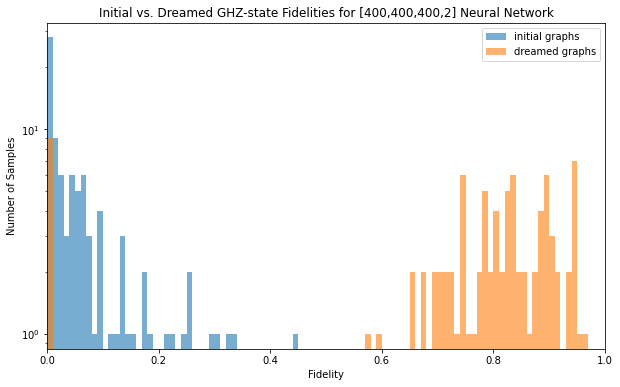

In [42]:
# Make the histogram plot
plt.figure(figsize=(10, 6))
bins = np.arange(0, 1, 0.01)
plt.title('Initial vs. Dreamed GHZ-state Fidelities for [400,400,400,2] Neural Network')
plt.yscale('log')
plt.xlim([0,1])
plt.hist(init, bins=bins, alpha=0.6, orientation="vertical",label='initial graphs')
plt.hist(final, bins=bins, alpha=0.6, orientation="vertical",label='dreamed graphs')
plt.xlabel('Fidelity')
plt.ylabel('Number of Samples')
plt.legend(prop={'size': 10})


# Figure 4: Crazy Graph Plot

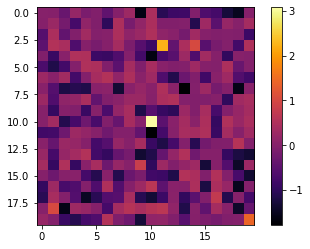

In [5]:
# Instead of plotting results from every neuron, let's proritize neurons 

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
modelName = "4q_bn_last3_seed5922"
model = load_model(f"models/{modelName}.pt", device, 24,1,10)
weights = model.mynn[4].weight[0]
weights = weights.detach().numpy()

# An idea: let's look at contributions from the "most important neurons"

importantNeurons = np.where(np.abs(weights)>0.20)

# Make a heat plot

reshapeWeights = np.reshape(weights, (20,20))
plt.imshow(reshapeWeights, cmap='inferno')
plt.colorbar()

In [48]:
import yaml 
from yaml import Loader

# Let's load up data from dreaming on the inverse layer

directory = "dreamfiles/dream_last3_one_layer6_888"
neuron_indices = np.arange(800,802)
fileLists = []
data = []

stream = open("configs/anaDream.yaml", 'r')
cnfg = yaml.load(stream, Loader=Loader)

for neuron in neuron_indices:
    fileLists.append(glob.glob(f"{directory}/*_{neuron}.csv"))
    
# Now load up all the csv files

fileLists = fileLists[0]

for filename in fileLists:
    df = pd.read_csv(filename, sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), list(df.iloc[:, 2])])

res = [ele for ele in fileLists if ele != []]

dreamfiles/dream_last3_one_layer6_888\dream0_800.csv


['dreamfiles/dream_last3_one_layer6_888\\dream0_800.csv']

These functions compute histograms of all the avaliable perfect matchings 

In [10]:
# Functions are very similar to the regular histogram making ones. Is just that now we're dealing with three of them. 

def getPMKets(fileList, edges):
    finalWeights = loadAll(fileList)[0]
    ultiKets = []
    # Store all information about the ket amplitudes in seperate lists
    for subList in finalWeights:
        graph = fc.Graph(edges=edges, weights=subList)
        ultiKets.append(getPMAmplitudes(graph))
    return ultiKets


# This retrieves information about the kets and their corresponding values from each graph.  

def extractPMKets(fileList, edges, isProb):
    ultiKets = getPMKets(fileList, edges)
    totalPMKets = {}
    for ket in ultiKets[0].keys():
        ketList = []
        for graph in ultiKets:
            if (isProb):
                ketList.append(np.abs(graph[ket])**2)
            else:
                ketList.append(graph[ket])
        totalPMKets[ket] =  ketList
        
    return totalPMKets


# Adds them up, computes variance, then plots that over histogram 

def getMeanVar(fileList, edges, cnfg):
    # Load up relevant parameters
    isProb = cnfg['isProb']
    saveDirec = cnfg['saveDirec']
    # Obtain total ket dictionary 
    totalKets = extractPMKets(fileList, edges, True)
    # Compute mean/variance for each ket
    meanPMKet = {}
    varPM = []
    for ket in totalKets.keys():
        meanPMKet[ket] = np.mean(totalKets[ket],axis = 0)
        varPM.append(np.var(totalKets[ket],axis =0))
    return meanPMKet, varPM

# This returns the contributions due to perfect matchings for each ket given a graph as input

def getPMAmplitudes(graph):
    states = graph.state_catalog
    kets = list(states.keys())
    ultiKet = {}
    for ket in kets:
        pms = []
        for subgraph in states[ket]:
            pms.append(np.prod([graph[edge] for edge in subgraph]))
        ultiKet[ket] = pms
    return ultiKet


meanPMs = []
varPMs = []

for ii in np.arange(0,1):
    meanPMs.append(list(getMeanVar(res[ii], edges, cnfg)[0].values()))


len(fileLists[0])

NameError: name 'res' is not defined

# Let's make a crazy visualization out of the neural networks (based on this paper)


https://kindxiaoming.github.io/pdfs/BIMT.pdf


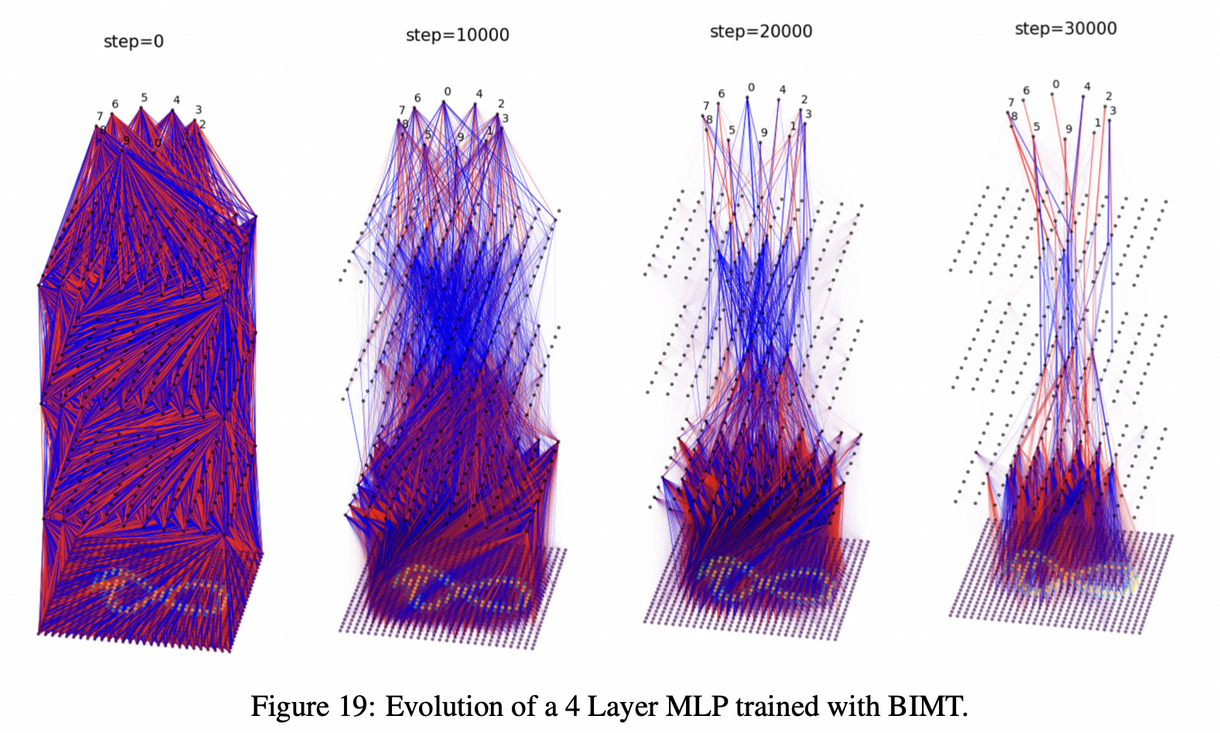



In [126]:
# Let's see what happens when we make a grid of x,y points
import numpy as np

# Define the size of the grid
n = 20

# Create arrays of x and y coordinates for each point in the grid
x = np.arange(n)
y = np.arange(n)

# Use meshgrid to generate a grid of (x, y) coordinates
X, Y = np.meshgrid(x, y)

# create a list of coordinate points

coords = [(X[i,j], Y[i,j]) for i in range(n) for j in range(n)]

coords[1]

(1, 0)

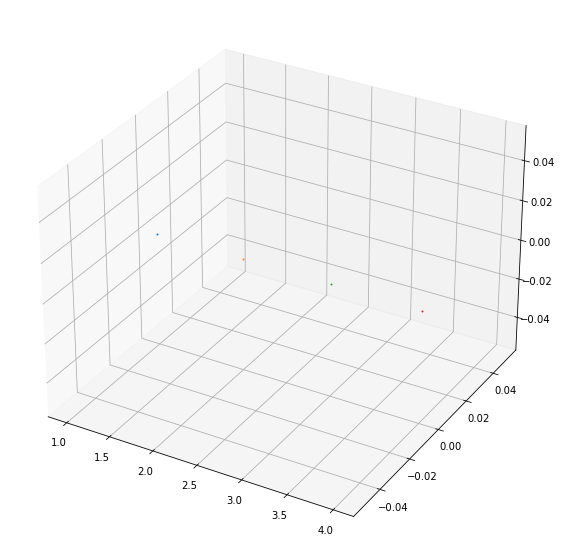

In [146]:
# Let's create a class for a neuron that holds (a) their designated layer and (b) the weights corresponding to previous neurons

class neuron:
    # x, y - double - coordinates of the neuron along a plane
    # WEIGHTS - array - weights of incoming edges of the neuron 
    # LAYER - int - which layer does the neuron lay in the network?
    # rad - double - how big ought the neurons to appear? 
    def __init__(self, x, y, WEIGHTS, LAYER, RAD):
        self.weights=WEIGHTS
        self.layer=LAYER
        self.x = x
        self.y = y
        self.rad = RAD
    
    def draw(self):
        point = plt.scatter(self.x, self.y,self.layer)
        
    def getWeight(self):
        return self.weights
    
    def getLayer(self):
        return self.layer
    
    def setWeights(self, WEIGHTS):
        self.weights = WEIGHTS
    
    def setLayers(self, LAYER):
        self.layer = LAYER

# Define layer+neuron indices for each layer

hiddenLayers = np.arange(1,4)
neuronsHidden = np.arange(400)
neuronsBN = np.arange(2)
neuRad = 0.05

totalNeurons = [neuronsHidden, neuronsHidden, neuronsBN]

# Now let's create a list of these neurons 

neurons = []

for layer in hiddenLayers:
    neuList = totalNeurons[layer-1]
    for ii, neu in enumerate(neuList):
        x,y = coords[ii]
        weights = model.mynn[layer*2].weight[neu]
        weights = weights.detach().numpy()
        neurons.append(neuron(x, y, weights, layer, neuRad))
        
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Let's make that crazy plot

0 0
0 1


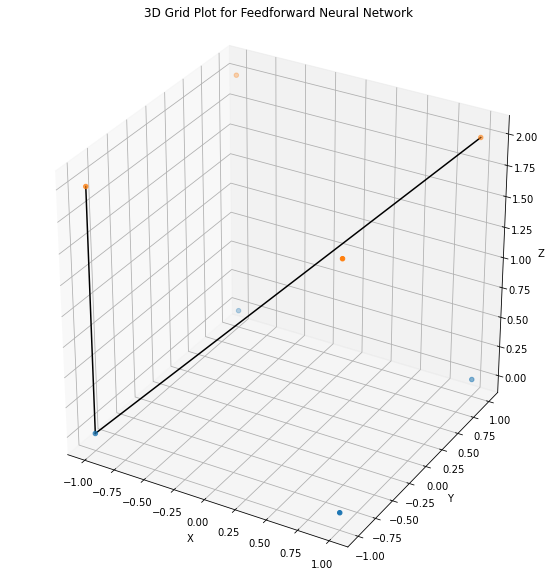

In [83]:
# Generate some random data
x = np.linspace(-1,1,2)
y = np.linspace(-1,1,2)
xx, yy = np.meshgrid(x,y)

# Create edges by specifying indices

coords = [(0,j) for j in np.arange(len(xx))]

# Create a figure and 3D axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a scatter plot
ax.scatter(xx,yy,0)
ax.scatter(xx,yy,2)

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Grid Plot for Feedforward Neural Network')


# Plot them edges 
for i, j in coords:
    print(i,j)
    ax.plot([x[i], x[j]], [y[i], y[j]],[0,2], 'k-')

ax.set_box_aspect([4,4,4])

# Show the plot
plt.show()

In [75]:
coords

[(0, 0), (0, 1), (0, 2), (0, 3)]

# Make 3D/2D Plots of the histograms 

In [ ]:
#Let's get ready to plot those histograms

sampleMean = getMeanVar(fileLists[0], edges, cnfg)[0]

x_ticks = []
for ket in sampleMean.keys():
    x_ticks.append(f"|{ket[0][1]},{ket[1][1]},{ket[2][1]},{ket[3][1]}>")
x_ticks = x_ticks


# Make individual plots on the inverse dreamed graphs 

In [ ]:
# Plots individual graphs 
def graphPlotter(finalWeights, edges, firstIndex, lastIndex, threshold, fancyPlot=False):
    selectWeights = finalWeights[firstIndex:lastIndex]
    avgWeight = [sum(sub_list) / len(sub_list) for sub_list in zip(*selectWeights)]
    graph = fc.Graph(edges=edges, weights=avgWeight)
    graph.getState()
    dreamstate = graph.state
    dreamstate.normalize()
    print("State:")
    print(graph.state)
    print(f"Fidelity: {(state @ graph.state) ** 2}")
    graph.purge(threshold=threshold, update=True)
    newgraph = fc.Graph(graph.edges, weights=graph.weights)
    if(fancyPlot):
        gp.leiwandPlot(newgraph)
    else:
        gp.graphPlot(newgraph)

        
finalWeights = loadAll(fileLists[0])[0]
activations = loadAll(combFile)[0]

#maxActive = np.argmax(activations)
graphPlotter(finalWeights, edges,0,1,0.3)   
        
